In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['BP'] = label.fit_transform(df['BP'])
df['Cholesterol'] = label.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [6]:
df1 = df.Drug.value_counts()
df1

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<BarContainer object of 5 artists>

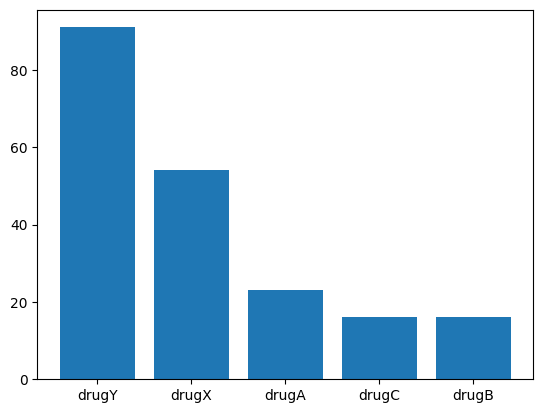

In [7]:
plt.bar(df1.index,df1.values)

In [8]:
df.corr(numeric_only=True)


,Age,Sex,BP,Cholesterol,Na_to_K
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000


<Axes: >

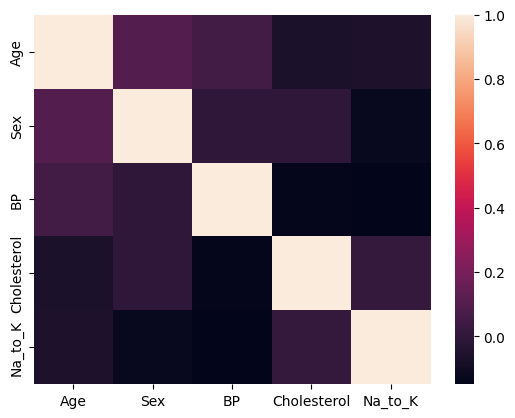

In [9]:
sns.heatmap(df.corr(numeric_only=True))

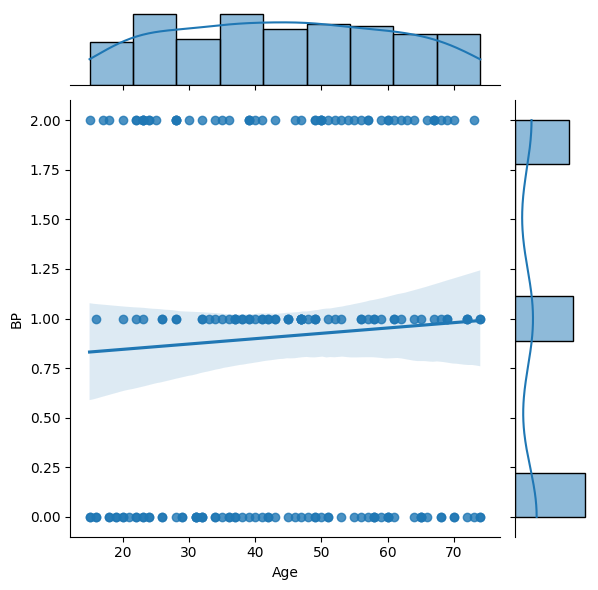

In [10]:
sns.jointplot(x = 'Age',y = 'BP',data = df,kind='reg')


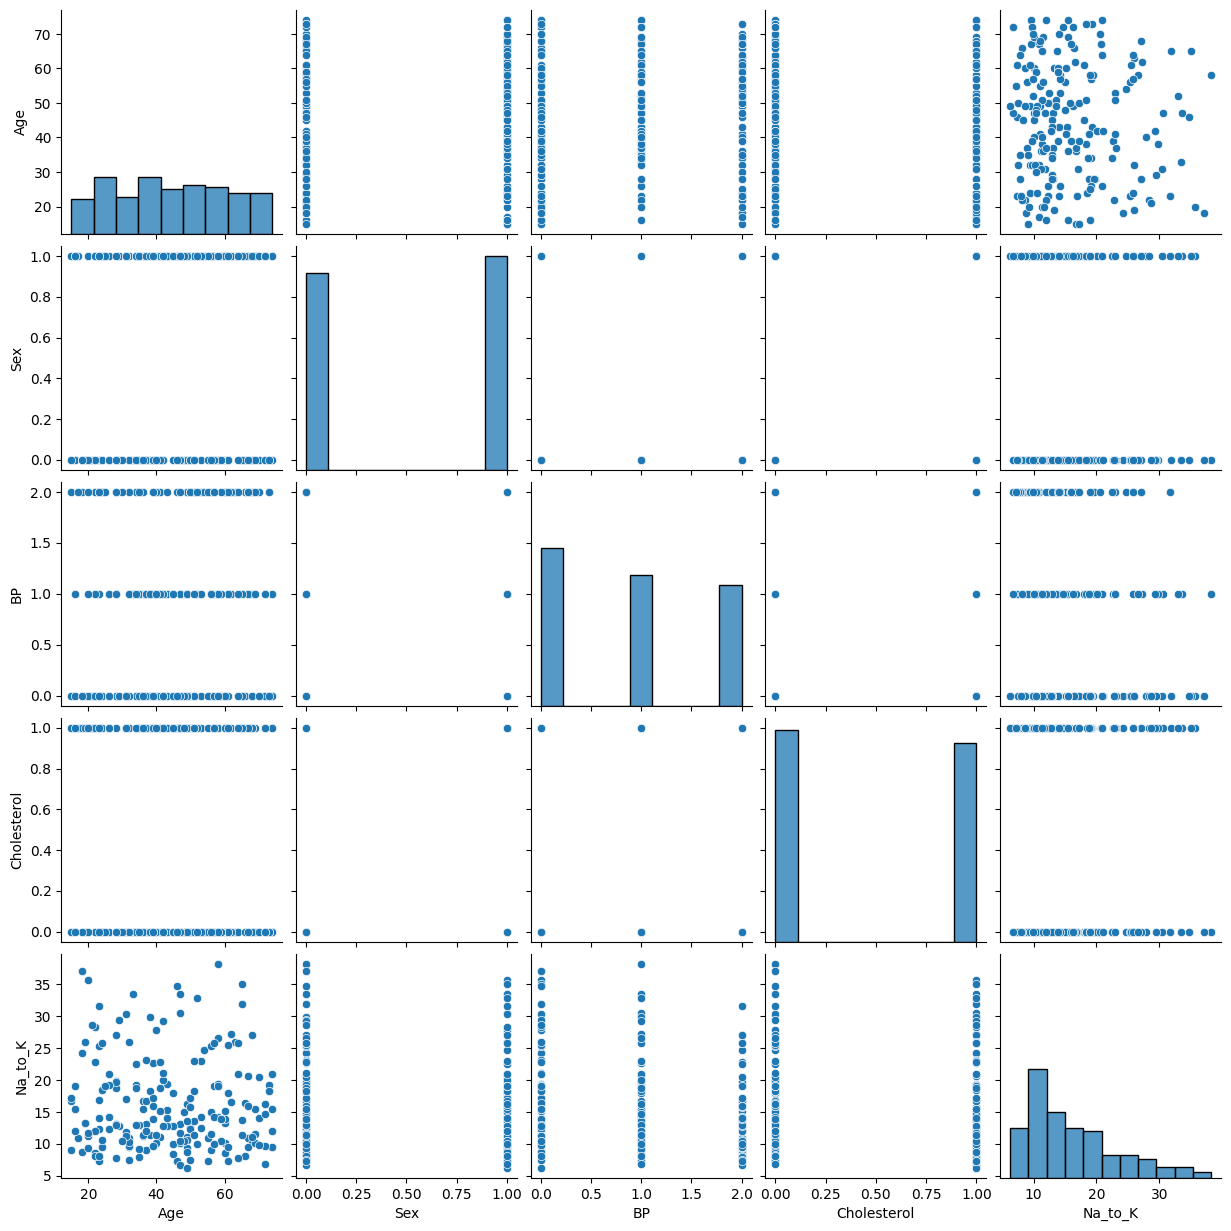

In [11]:
sns.pairplot(df)

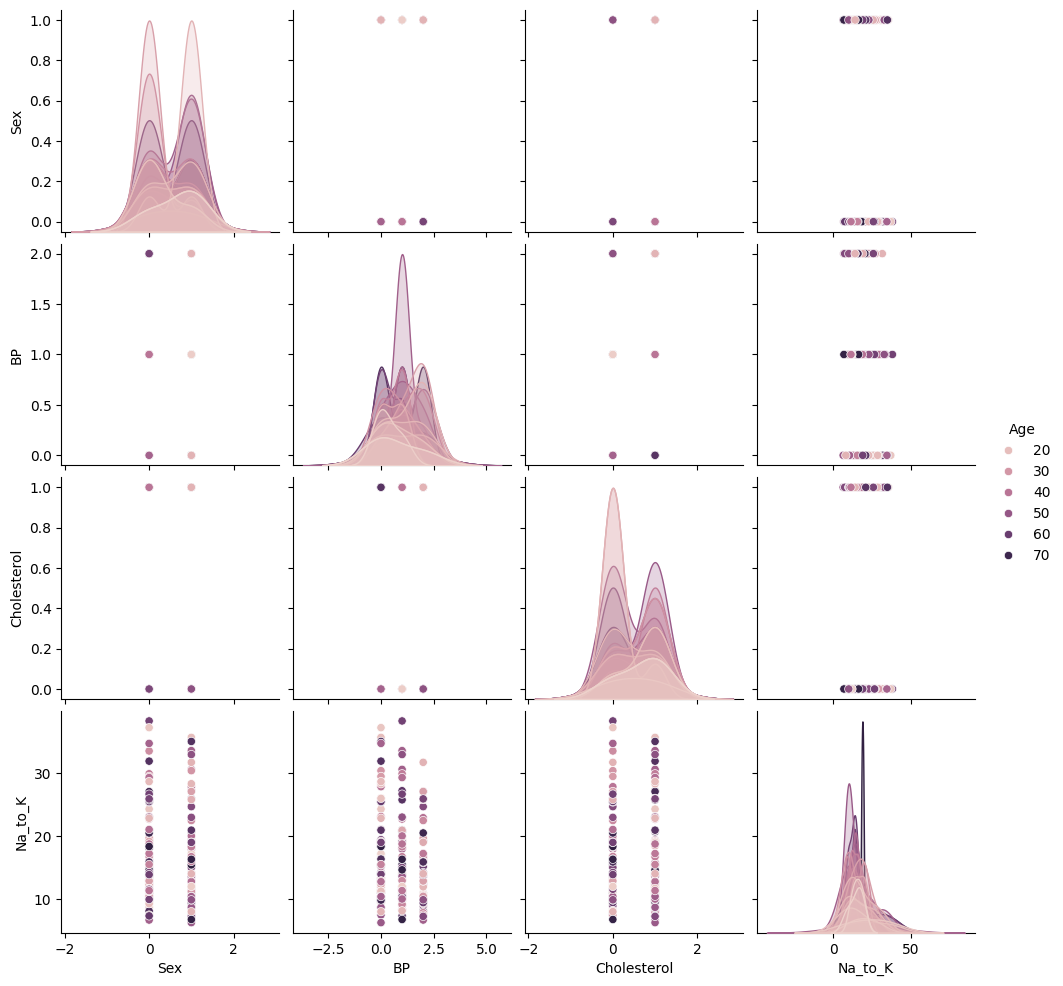

In [12]:
sns.pairplot(df,hue='Age')

<Axes: ylabel='Age'>

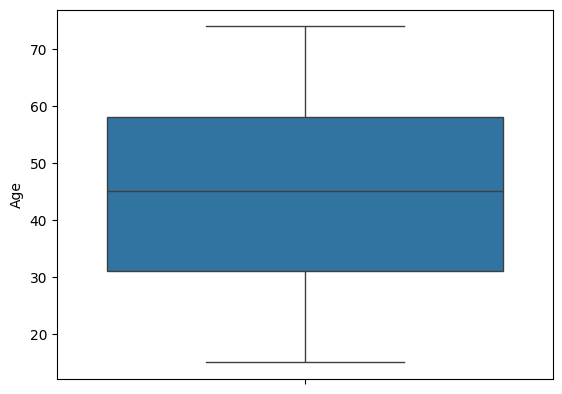

In [13]:
sns.boxplot(y='Age',data = df)

In [14]:
Q1 = np.percentile(df['Age'],25,method = 'midpoint')
Q3 = np.percentile(df['Age'],75,method = 'midpoint')
IQR = Q3 - Q1
print(IQR)

27.0


In [15]:
upper = Q3 + 1.5*IQR
upper_array = np.array(df['Age']>=upper)
print('Upper Bound: ', upper)
print(upper_array)
print(upper_array.sum())

Upper Bound:  98.5
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False F

In [16]:
lower = Q1 - 1.5*IQR   
lower_array = np.array(df['Age']<=lower)
print("Lower Bound: ", lower)
print(lower_array)
print(lower_array.sum())

Lower Bound:  -9.5
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False F

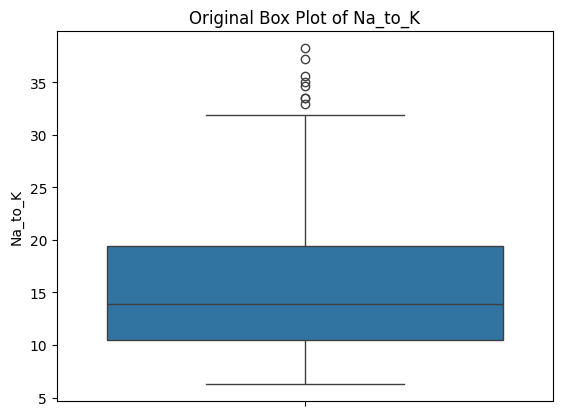

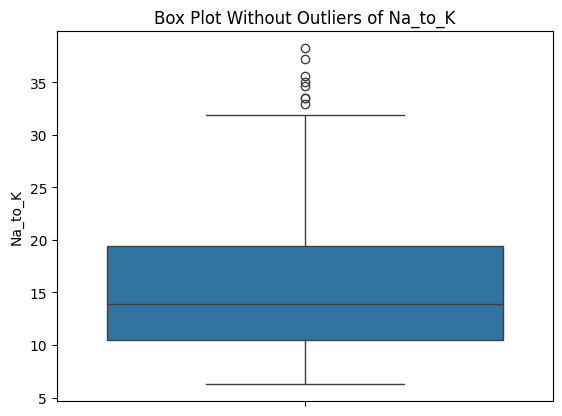

In [17]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f"Original Box Plot of {column}")
    plt.show()

    removed_outliers = df[df[column]<= threshold]
    sns.boxplot(removed_outliers[column])
    plt.title(f"Box Plot Without Outliers of {column}")
    plt.show()
    return removed_outliers
threshold_value = 40
no_outliers = removal_box_plot(df,'Na_to_K',threshold_value)

In [18]:
x =df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
y_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [23]:
df.columns
df['Drug'].value_counts()


Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [24]:
y_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.966\nsamples = 140\nvalue = [16, 13, 10, 36, 65]\nclass = drugB'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.81\nsamples = 75\nvalue = [16, 13, 10, 36, 0]\nclass = drugC'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'Age <= 50.5\nentropy = 0.992\nsamples = 29\nvalue = [16, 13, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.755\nsamples = 46\nvalue = [0, 0, 10, 36, 0]\nclass = drugC'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 10, 11, 0]\nclass = drugC'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]\nclass = drugA'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]\nclass = drugC'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 0

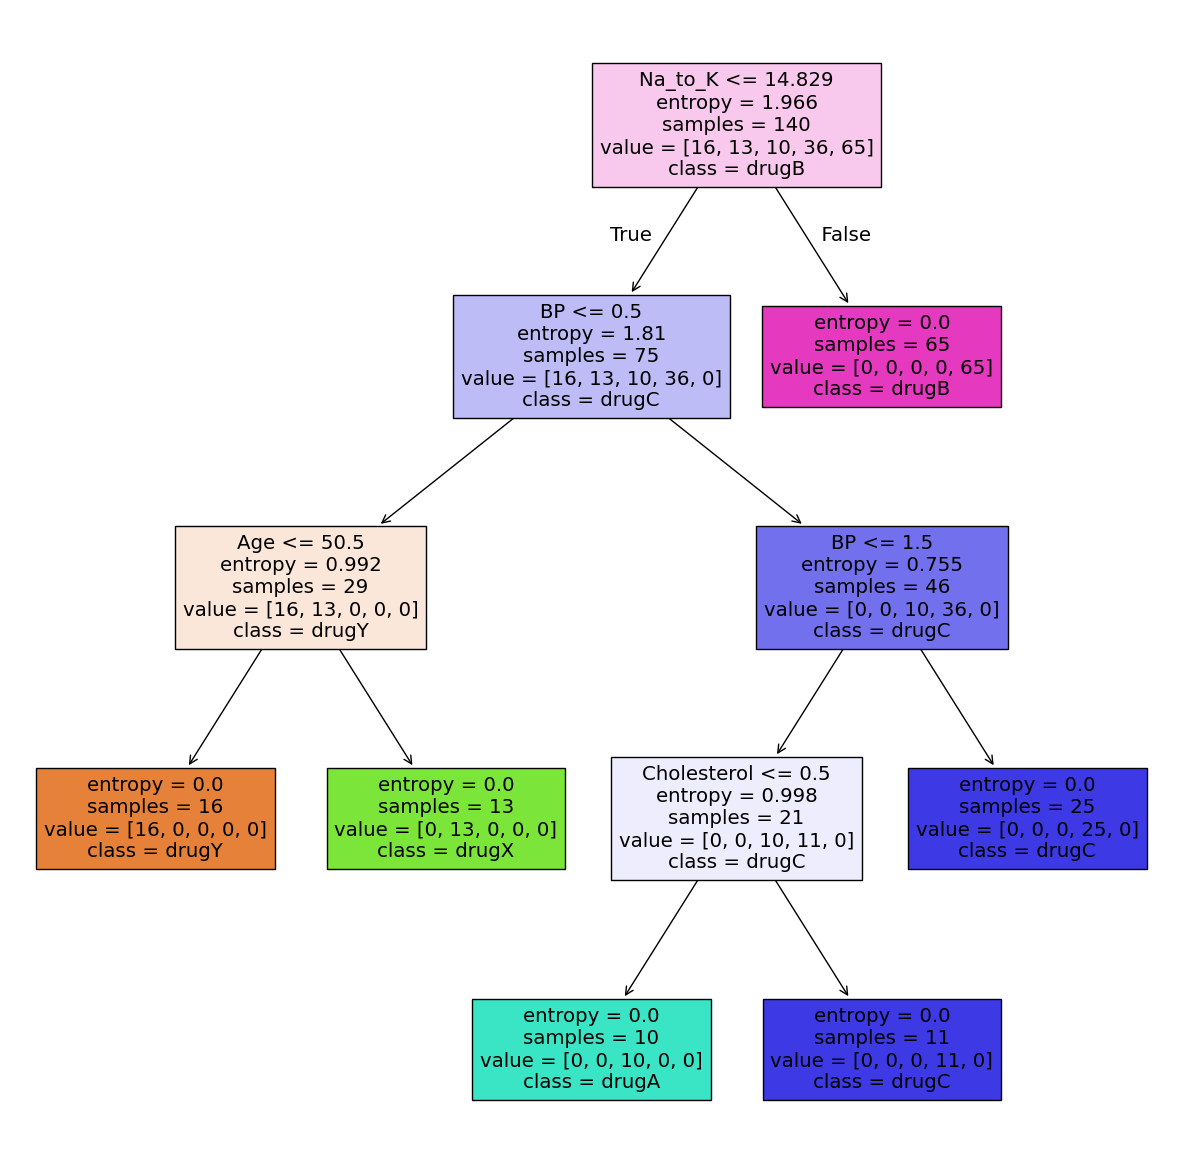

In [25]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'],class_names=['drugY', 'drugX', 'drugA','drugC', 'drugB'],filled=True)